# Basic Image play

In [1]:
import nibabel as nib

# Define the path to the NIfTI file
nii_path = "MR_9536886_6b8e/12/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii"

# Load the NIfTI file
img = nib.load(nii_path)

# Get the dimensions of the image


data_shape = img.shape

# Print the dimensions
print(f"Dimensions of {nii_path}: {data_shape}")


Dimensions of MR_9536886_6b8e/12/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii: (192, 256, 256)


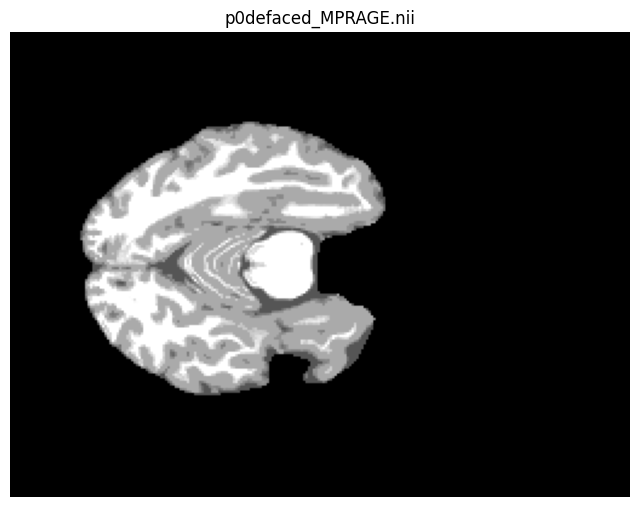

In [2]:
import matplotlib.pyplot as plt
data = img.get_fdata()

# Display the image using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(data[:, :, data.shape[2] // 2], cmap='gray')
plt.title('p0defaced_MPRAGE.nii')
plt.axis('off')
plt.show()

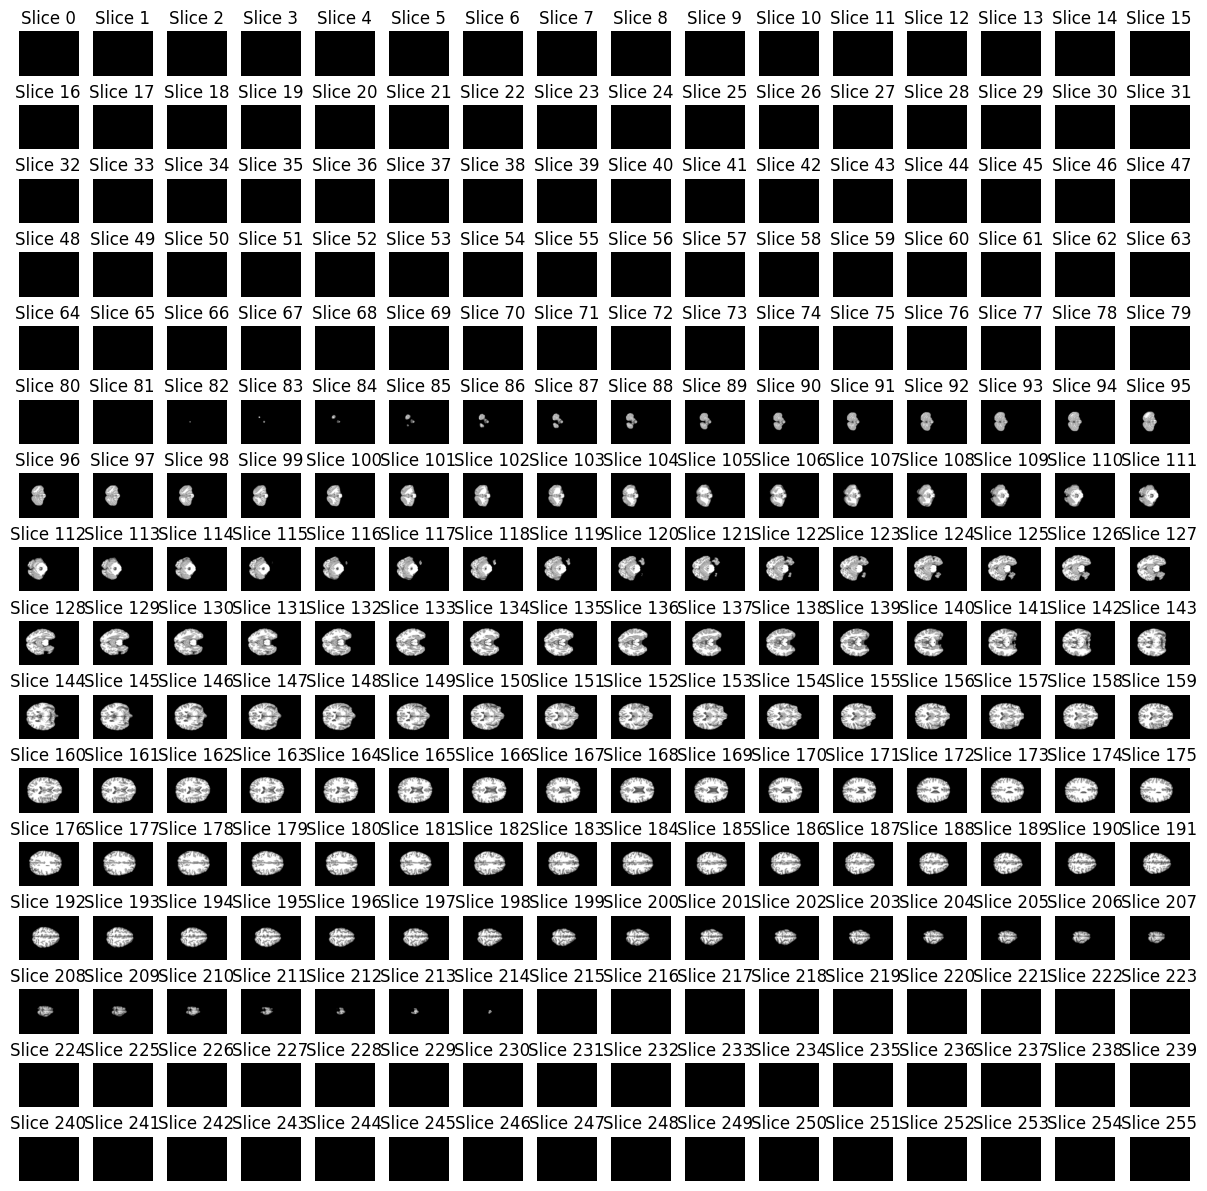

In [3]:
num_slices = data.shape[2]  # Number of slices in the Z-direction

# Define the number of rows and columns for the montage
rows, cols = 16,16

# Create a subplot for each slice
plt.figure(figsize=(12, 12))
for i in range(min(rows * cols, num_slices)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(data[:, :, i], cmap='gray')
    plt.title(f"Slice {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [1]:
import nibabel as nib
import pandas as pd

# Define the path to the NIfTI file
nii_path = "MR_9536886_6b8e/12/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii"

# Load the NIfTI file
img = nib.load(nii_path)

print(img)
# Convert the Numpy array to a Pandas DataFrame
# df = pd.DataFrame(image_data)

# Now 'df' is a Pandas DataFrame containing the image data




<class 'nibabel.nifti1.Nifti1Image'>
data shape (192, 256, 256)
affine:
[[  -1.            0.            0.           93.73579407]
 [   0.            1.            0.          -98.52087402]
 [   0.            0.            1.         -147.00888062]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 

# Load the grey matter segmented images

In [3]:
import os
import nibabel as nib

# Root directory where your subfolders with "p0defaced_MPRAGE.nii" files are located
root_directory = '/Users/siddharthdeo/Downloads/Segmented images'

def load_all_p0defaced_MPRAGE_files(directory):
    loaded_images = []

    # Get a sorted list of subdirectories in the root directory
    sorted_dirs = sorted([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])

    for dir_name in sorted_dirs:
        dir_path = os.path.join(directory, dir_name)
        for root, dirs, files in os.walk(dir_path):
            # Check if the current directory contains the "p0defaced_MPRAGE.nii" file
            if 'p0defaced_MPRAGE.nii' in files:
                file_path = os.path.join(root, 'p0defaced_MPRAGE.nii')
                try:
                    image = nib.load(file_path)
                    loaded_images.append(image)
                    print(f"Loaded: {file_path}")
                except Exception as e:
                    print(f"Error loading {file_path}: {str(e)}")

    return loaded_images
    

# Call the function with your root directory
loaded_images = load_all_p0defaced_MPRAGE_files(root_directory)


Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1013090_500c/11/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1097782_3f0c/11/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1143655_1a05/9/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1150497_75ee/11/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1216620_3cfc/11/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1264721_41eb/11/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1285465_4097/11/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1288657_3170/11/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii
Loaded: /Users/siddharthdeo/Downloads/Segmented images/MR_1292527_195c/11/DEFACED_NIFTI/mri/p0def

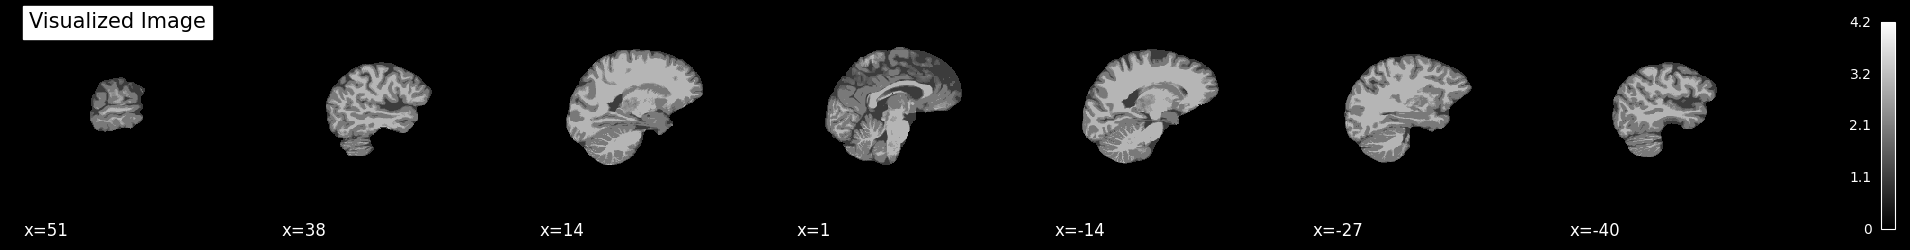

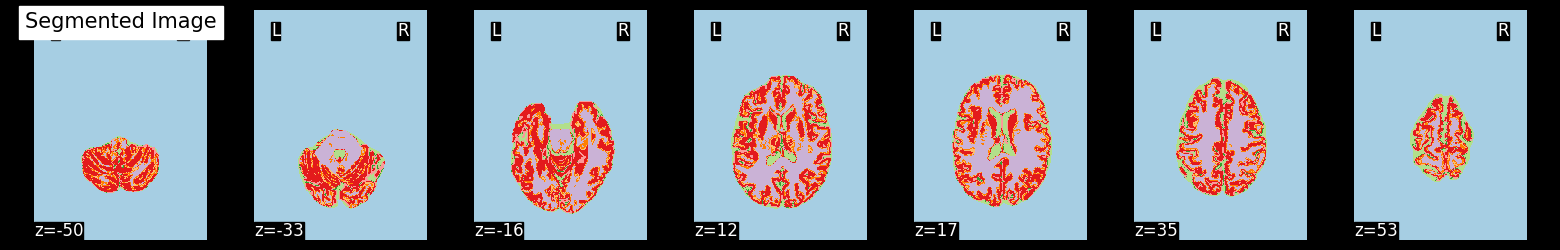

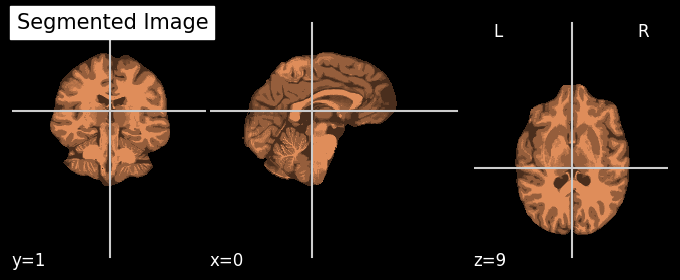

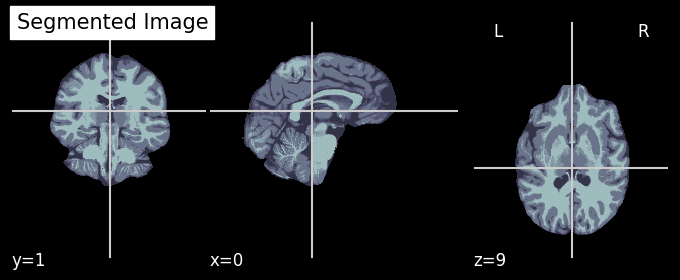

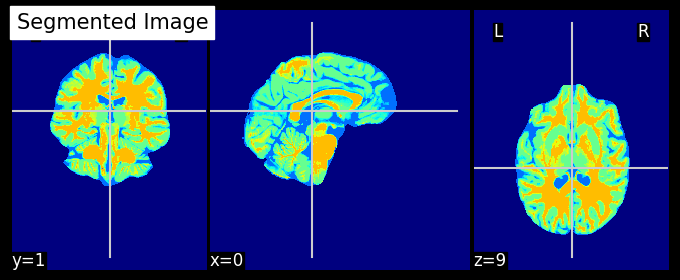

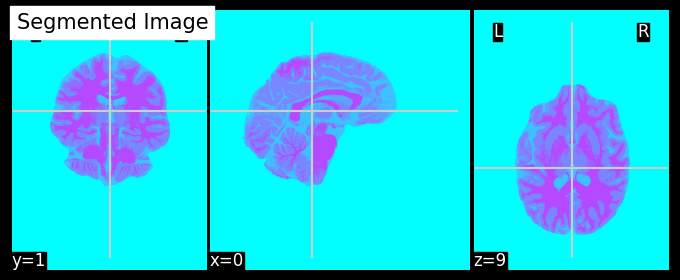

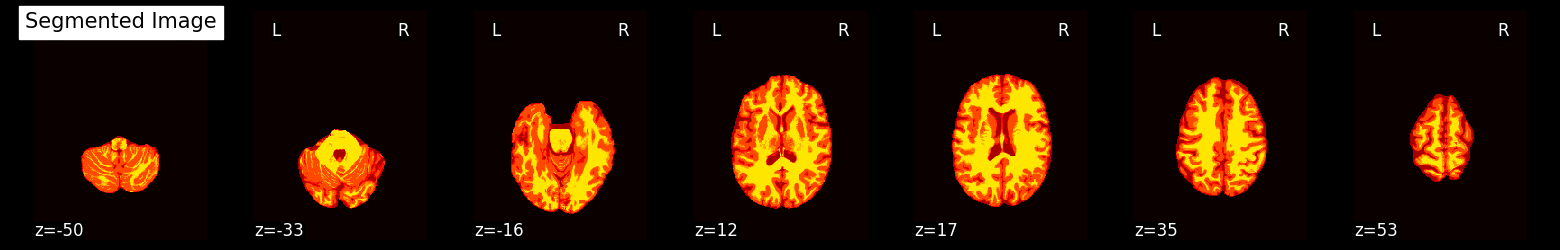

In [3]:
from nilearn import plotting

# Select an image from the list (e.g., the first image)
selected_image = loaded_images[160]

# Plot the image using Nilearn's plotting function
plotting.plot_anat(selected_image,display_mode='x', cmap='gray', title='Visualized Image', colorbar=True)
plotting.plot_anat(selected_image, title='Segmented Image', display_mode='z', cut_coords=None, cmap='Paired')
plotting.plot_anat(selected_image, title='Segmented Image', display_mode='ortho', cut_coords=None, cmap='copper')
plotting.plot_anat(selected_image, title='Segmented Image', display_mode='ortho', cut_coords=None, cmap='bone')
plotting.plot_anat(selected_image, title='Segmented Image', display_mode='ortho', cut_coords=None, cmap='jet')
plotting.plot_anat(selected_image, title='Segmented Image', display_mode='ortho', cut_coords=None, cmap='cool')
plotting.plot_anat(selected_image, title='Segmented Image', display_mode='z', cut_coords=None, cmap='hot')



# Display the plot
plotting.show()


In [4]:
import numpy as np

# Load the TIV values from the "tiv.txt" file
tiv_filename = '/Users/siddharthdeo/Downloads/Segmented images/TIVfinal.txt'

# Initialize an empty list to store TIV values
tiv_values = []

with open(tiv_filename, 'r') as file:
    for line in file:
        tiv = float(line.strip())
        tiv_values.append(tiv)

# Function to perform TIV rescaling on a single image
def rescale_image(image, tiv_value):
    try:
        image_data = image.get_fdata()
        rescaled_data = image_data / tiv_value
        return nib.Nifti1Image(rescaled_data, affine=image.affine)
    except Exception as e:
        print(f"Error processing image: {str(e)}")
        return None

# Perform TIV rescaling on all loaded images
rescaled_images = []

for i, image in enumerate(loaded_images):
    if i < len(tiv_values):
        try:
            tiv_value = tiv_values[i]
            rescaled_image = rescale_image(image, tiv_value)
            if rescaled_image is not None:
                rescaled_images.append(rescaled_image)
                print(f"Rescaled image {i + 1}/{len(loaded_images)}")
            else:
                print(f"Skipping image {i + 1} due to processing error")
        except Exception as e:
            print(f"Error processing image {i + 1}: {str(e)}")
            print(f"Skipping image {i + 1} and its corresponding TIV value")
    else:
        print(f"No TIV value found for image {i + 1}")
        

# Now, rescaled_images contains the images after TIV rescaling


Rescaled image 1/165
Rescaled image 2/165
Rescaled image 3/165
Rescaled image 4/165
Rescaled image 5/165
Rescaled image 6/165
Rescaled image 7/165
Rescaled image 8/165
Rescaled image 9/165
Rescaled image 10/165
Rescaled image 11/165
Rescaled image 12/165
Rescaled image 13/165
Rescaled image 14/165
Rescaled image 15/165
Rescaled image 16/165
Rescaled image 17/165
Rescaled image 18/165
Rescaled image 19/165
Rescaled image 20/165
Rescaled image 21/165
Rescaled image 22/165
Rescaled image 23/165
Rescaled image 24/165
Rescaled image 25/165
Rescaled image 26/165
Rescaled image 27/165
Rescaled image 28/165
Rescaled image 29/165
Rescaled image 30/165
Rescaled image 31/165
Rescaled image 32/165
Rescaled image 33/165
Rescaled image 34/165
Rescaled image 35/165
Rescaled image 36/165
Rescaled image 37/165
Rescaled image 38/165
Rescaled image 39/165
Rescaled image 40/165
Rescaled image 41/165
Rescaled image 42/165
Rescaled image 43/165
Rescaled image 44/165
Rescaled image 45/165
Rescaled image 46/1

KeyboardInterrupt: 

In [8]:
for img in rescaled_images:
    # Get the shape (dimensions) of each image
    shape = img.shape
    print(f"Image Dimensions: {shape}")


Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (191, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensions: (192, 256, 256)
Image Dimensio

In [9]:
rescale_imagefinal=[]
from scipy.ndimage import zoom
def resample_nifti_image(nifti_image, target_shape):
    # Get the original image data
    image_data = nifti_image.get_fdata()

    # Calculate the zoom factors for resampling
    zoom_factors = [target / current for target, current in zip(target_shape, image_data.shape)]

    # Resample the image data
    resampled_data = zoom(image_data, zoom_factors, order=3)  # 'order=3' indicates cubic spline interpolation

    # Create a new NIfTI image with the resampled data
    resampled_nifti = nib.Nifti1Image(resampled_data, nifti_image.affine)

    return resampled_nifti
for i, img in enumerate(rescaled_images):
    # Get the shape (dimensions) of each image
    shape = img.shape
    
    # Check if the shape is not (192, 256, 256)
    if shape != (192, 256, 256):
        rescale_imagefinal.append(resample_nifti_image(img, (192, 256, 256)))
        print(f"Image {i + 1} Dimensions: {shape}")
    else:
        rescale_imagefinal.append(img)


Image 26 Dimensions: (191, 256, 256)
Image 42 Dimensions: (191, 256, 256)
Image 83 Dimensions: (190, 256, 256)
Image 89 Dimensions: (189, 256, 256)
Image 119 Dimensions: (191, 256, 256)
Image 120 Dimensions: (191, 256, 256)


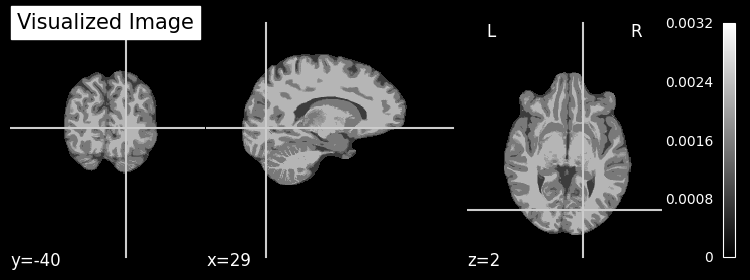

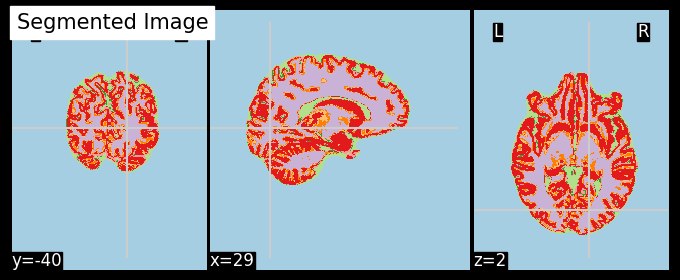

In [10]:
from nilearn import plotting

# Select an image from the list (e.g., the first image)
selected_image = rescale_imagefinal[100]

# Plot the image using Nilearn's plotting function
plotting.plot_anat(selected_image, cmap='gray', title='Visualized Image', colorbar=True)
plotting.plot_anat(selected_image, title='Segmented Image', display_mode='ortho', cut_coords=None, cmap='Paired')


# Display the plot
plotting.show()


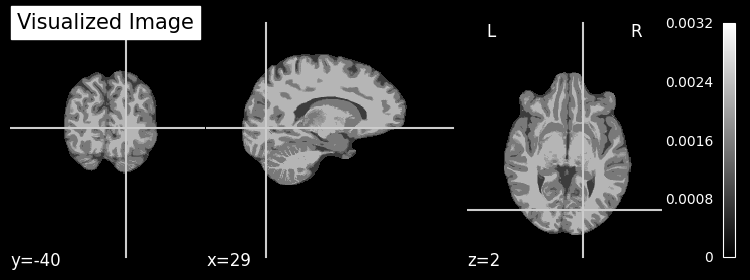

In [11]:
rescale_imagefinal[100]

# Plot the image using Nilearn's plotting function
plotting.plot_anat(selected_image, cmap='gray', title='Visualized Image', colorbar=True)

In [12]:
import os
import numpy as np

# Create a directory to save the vectorized data
output_directory = 'vectorize_data'
os.makedirs(output_directory, exist_ok=True)

# Define the batch size
batch_size = 33

# Iterate through the images in batches
for i in range(0, len(rescale_imagefinal), batch_size):
    batch_images = rescale_imagefinal[i:i + batch_size]
    
    # Vectorize the batch of images
    vectorized_batch = [image.get_fdata().flatten() for image in batch_images]

    # Save the vectorized data for this batch
    batch_output_dir = os.path.join(output_directory, f'batch_{i // batch_size}')
    os.makedirs(batch_output_dir, exist_ok=True)
    np.save(os.path.join(batch_output_dir, 'vectorized_data.npy'), vectorized_batch)


KeyboardInterrupt: 

In [13]:
import os
import numpy as np
from sklearn.decomposition import PCA

# Directory where you saved the vectorized data
vectorized_data_directory = 'vectorize_data'

# Initialize a list to store the two principal components for each batch
all_principal_components = []

# Iterate through the batch directories
for batch_dir in os.listdir(vectorized_data_directory):
    batch_dir_path = os.path.join(vectorized_data_directory, batch_dir)

    # Load the vectorized data for the batch
    vectorized_data = np.load(os.path.join(batch_dir_path, 'vectorized_data.npy'))

    # Apply PCA to obtain two principal components
    num_components = 2
    pca = PCA(n_components=num_components)
    principal_components = pca.fit_transform(vectorized_data)

    # Append the principal components to the list
    all_principal_components.append(principal_components)

# 'all_principal_components' now contains the two principal components for all batches


: 

: 

In [ ]:
all_principal_components

In [ ]:
import numpy as np

# Assuming all_principal_components is a list of 2-component arrays
merged_principal_components = np.concatenate(all_principal_components, axis=0)

# merged_principal_components is now a single array containing all principal components


In [ ]:
len(merged_principal_components)

In [ ]:
import matplotlib.pyplot as plt

# Assuming merged_principal_components is a 2D NumPy array
x = merged_principal_components[:, 0]
y = merged_principal_components[:, 1]

# Create a scatter plot
plt.scatter(x, y, marker='o', s=10)  # 'o' represents the marker style, s sets marker size

# Add labels and a title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')

# Show the plot
plt.show()


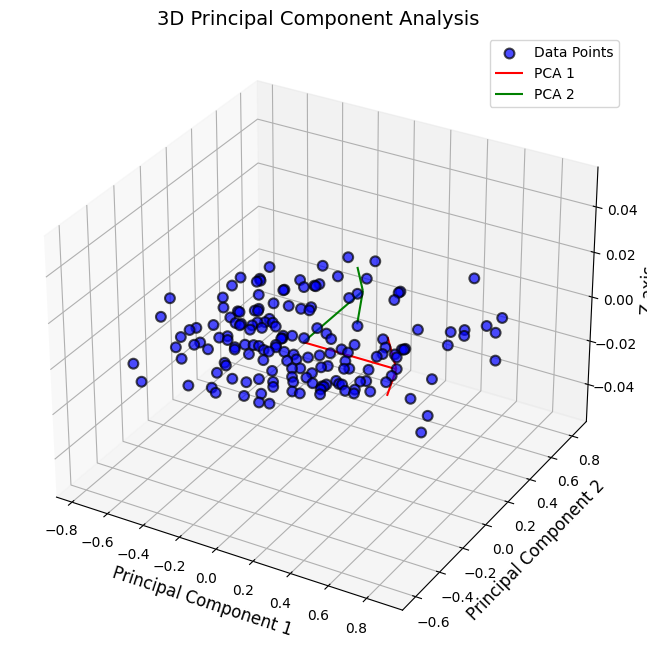

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming merged_principal_components is a 2D NumPy array
x = merged_principal_components[:, 0]
y = merged_principal_components[:, 1]

# Create a figure with 3D projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(x, y, zs=0, c='blue', s=50, alpha=0.7, edgecolors='k', linewidths=1.5, label='Data Points')

# Add arrows for the PCA components in 3D
arrow_length = 0.5
ax.quiver(0, 0, 0, arrow_length, 0, 0, color='red', label='PCA 1', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, arrow_length, 0, color='green', label='PCA 2', arrow_length_ratio=0.1)

# Add labels and a title
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Z-axis', fontsize=12)  # Third dimension

# Set the title for the 3D plot
ax.set_title('3D Principal Component Analysis', fontsize=14)

# Add a legend
ax.legend(fontsize=10)

# Show the 3D plot
plt.show()


Train the model

In [6]:
import pandas as pd
df = pd.read_csv('FullScaleIQ.csv')
labels = df.iloc[:, 2].values
labels

array([109, 127, 127, 113, 120, 103, 106, 114,  94, 129, 118, 114, 120,
       100, 108, 118, 100, 115,  84, 108, 108, 109, 100, 109, 103,  89,
       116, 123,  92, 100, 109,  87,  74, 128, 121, 124, 120, 118,  98,
       106, 129, 104, 100, 129, 112, 126, 101,  97,  92, 113,  85, 118,
        84, 125, 106, 123, 105, 119, 104, 123, 107,  89, 120, 120,  91,
       131, 113, 123, 105, 113, 101, 103,  98, 115, 106, 114, 103, 103,
        88,  89,  95, 125, 109, 114, 111,  90,  92, 123,  97, 107, 119,
       113, 105, 123, 137, 118, 104, 116, 123, 100,  95, 106, 120, 113,
        87, 138,  95, 107, 131,  98, 106, 120, 114,  74, 112, 100, 108,
       123, 117, 124,  88, 107, 101, 105, 105, 100,  93,  94, 136, 109,
       108, 108, 114,  90, 106, 108,  98, 115,  86, 114, 123, 132, 120,
       107, 109, 103, 127, 109, 124, 123, 130, 119,  94,  95, 103, 106,
       100, 121, 128, 109, 104, 113, 113, 108, 100])

# Linear SVR

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [8]:
# Split your data into training and testing sets (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(merged_principal_components, labels, test_size=0.2, random_state=42)


In [48]:
# Create a Linear SVR model
svr = SVR(kernel='linear')

# Train the SVR model on the training data
svr.fit(X_train, y_train)


SVR(kernel='linear')

In [49]:
# Make predictions on the test data
y_pred = svr.predict(X_test)


In [51]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 151.4262495844701


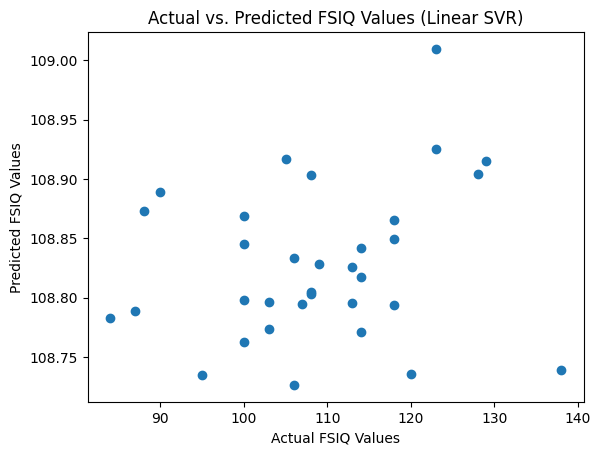

In [52]:
import matplotlib.pyplot as plt

# Visualize the actual vs. predicted FSIQ values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual FSIQ Values")
plt.ylabel("Predicted FSIQ Values")
plt.title("Actual vs. Predicted FSIQ Values (Linear SVR)")
plt.show()


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predictions on the test set
y_pred = svr.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 151.4262495844701
Root Mean Squared Error (RMSE): 12.305537354559942
Mean Absolute Error (MAE): 9.699354931556739


In [54]:
from math import sqrt

# Calculate the Root Mean Squared Error (RMSE)
rmse = sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 12.305537354559942


# Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define a range of n_estimators values to test
n_estimators_range = range(1, 200)  # You can adjust the range as needed

# Initialize variables to track the best parameters and performance
best_n_estimators = None
best_mse = float('inf')

# Iterate through the range of n_estimators
for n_estimators in n_estimators_range:
    # Create a Random Forest Regressor model
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Train the Random Forest model on the training data
    rf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_rf = rf.predict(X_test)

    # Calculate the Mean Squared Error
    mse_rf = mean_squared_error(y_test, y_pred_rf)

    # Check if the current model is the best so far
    if mse_rf < best_mse:
        best_mse = mse_rf
        best_n_estimators = n_estimators

# Print the best number of estimators and the corresponding MSE
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best Random Forest Mean Squared Error: {best_mse}")


Best n_estimators: 13
Best Random Forest Mean Squared Error: 176.78339609108835


In [56]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=13, random_state=42)

# Train the Random Forest model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Calculate the Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")


Random Forest Mean Squared Error: 176.78339609108835


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize variables to track the best parameters and performance
best_n_estimators = None
best_mse = float('inf')

# Iterate through the range of n_estimators
for n_estimators in n_estimators_range:
    # Create a Random Forest Regressor model
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Train the Random Forest model on the training data
    rf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_rf = rf.predict(X_test)

    # Calculate the Mean Squared Error
    mse_rf = mean_squared_error(y_test, y_pred_rf)

    # Check if the current model is the best so far
    if mse_rf < best_mse:
        best_mse = mse_rf
        best_n_estimators = n_estimators

# Print the best number of estimators and the corresponding MSE
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best Random Forest Mean Squared Error: {best_mse}")

# Calculate additional accuracy metrics
rmse_rf = np.sqrt(best_mse)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print additional accuracy metrics
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")


Best n_estimators: 13
Best Random Forest Mean Squared Error: 176.78339609108835
Root Mean Squared Error (RMSE): 13.29599173025797
Mean Absolute Error (MAE): 11.935739302573472


# XGboost

In [58]:
from xgboost import XGBRegressor

# Create an XGBoost Regressor model
xgb = XGBRegressor(n_estimators=10, random_state=42)

# Train the XGBoost model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb.predict(X_test)

# Calculate the Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb}")


XGBoost Mean Squared Error: 234.22722571982234


In [60]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define a range of n_estimators values to test
n_estimators_range = range(1, 101)  # You can adjust the range as needed

# Initialize variables to track the best parameters and performance
best_n_estimators = None
best_mse = float('inf')

# Iterate through the range of n_estimators
for n_estimators in n_estimators_range:
    # Create an XGBoost Regressor model
    xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

    # Train the XGBoost model on the training data
    xgb.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_xgb = xgb.predict(X_test)

    # Calculate the Mean Squared Error
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)

    # Check if the current model is the best so far
    if mse_xgb < best_mse:
        best_mse = mse_xgb
        best_n_estimators = n_estimators

# Print the best number of estimators and the corresponding MSE
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best XGBoost Mean Squared Error: {best_mse}")


Best n_estimators: 1
Best XGBoost Mean Squared Error: 156.04031885323593


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Create an XGBoost Regressor model
xgb = XGBRegressor(n_estimators=1)

# Train the XGBoost model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb.predict(X_test)

# Calculate the Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb}")

# Calculate additional accuracy metrics
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Print additional accuracy metrics
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"Mean Absolute Error (MAE): {mae_xgb}")


XGBoost Mean Squared Error: 156.04031885323593
Root Mean Squared Error (RMSE): 12.491609938404094
Mean Absolute Error (MAE): 10.035225608132102


# KNeighborsRegressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor

# Create a K-Nearest Neighbors Regressor model
knn = KNeighborsRegressor(n_neighbors=15)  # You can adjust the number of neighbors

# Train the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Calculate the Mean Squared Error
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Mean Squared Error: {mse_knn}")


K-Nearest Neighbors Mean Squared Error: 153.36835016835016


In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define a range of n_neighbors values to test
n_neighbors_range = range(1, 120)  # You can adjust the range as needed

# Initialize variables to track the best parameters and performance
best_n_neighbors = None
best_mse = float('inf')

# Iterate through the range of n_neighbors
for n_neighbors in n_neighbors_range:
    # Create a K-Nearest Neighbors Regressor model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Train the KNN model on the training data
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_knn = knn.predict(X_test)

    # Calculate the Mean Squared Error
    mse_knn = mean_squared_error(y_test, y_pred_knn)

    # Check if the current model is the best so far
    if mse_knn < best_mse:
        best_mse = mse_knn
        best_n_neighbors = n_neighbors

# Print the best number of neighbors and the corresponding MSE
print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best K-Nearest Neighbors Mean Squared Error: {best_mse}")


Best n_neighbors: 47
Best K-Nearest Neighbors Mean Squared Error: 142.58972248515028


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Create a K-Nearest Neighbors Regressor model
knn = KNeighborsRegressor(n_neighbors=47)  # You can adjust the number of neighbors

# Train the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Calculate the Mean Squared Error
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Mean Squared Error: {mse_knn}")

# Calculate additional accuracy metrics
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Print additional accuracy metrics
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"Mean Absolute Error (MAE): {mae_knn}")


K-Nearest Neighbors Mean Squared Error: 142.58972248515028
Root Mean Squared Error (RMSE): 11.941093856307733
Mean Absolute Error (MAE): 9.451321727917474


# MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Train the MLPRegressor on the training data
mlp.fit(X_train, y_train)



In [ ]:
# Make predictions on the test data
y_pred = mlp.predict(X_test)



In [ ]:
y_pred

In [ ]:
# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings
from sklearn.model_selection import GridSearchCV
warn=filterwarnings(action="ignore")
# Define a grid of hyperparameters to search
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (50, 50, 50)],  # You can add more configurations
    'max_iter': [100, 500, 1000],
    'random_state': [42]
}

# Create an MLPRegressor model
mlp = MLPRegressor()

# Create a GridSearchCV instance to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_
best_mlp = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_mlp.predict(X_test)

# Calculate the Mean Squared Error to evaluate the best model
mse = mean_squared_error(y_test, y_pred)

# Print the best hyperparameters and corresponding MSE
print("Best Hyperparameters:", best_params)
print(f"Best MLPRegressor Mean Squared Error: {mse}")


# Neural Network

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = keras.Sequential([
    keras.layers.Input(shape=(2,)),  # Input layer for 2 PCA components
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=200, verbose=1)  # You can adjust the number of epochs

# Evaluate the model on the test data
results = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", results[1])  # MSE
print("Mean Absolute Error:", results[2])  # MAE

2023-11-21 09:30:25.710918: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-21 09:30:25.710939: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-21 09:30:25.710943: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-21 09:30:25.711206: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-21 09:30:25.711479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/200


2023-11-21 09:30:26.730593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 3s 233ms/step - loss: 12080.7910 - mean_squared_error: 12080.7910 - mean_absolute_error: 109.1533
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 12060.9600 - mean_squared_error: 12060.9600 - mean_absolute_error: 109.0625
Epoch 3/200
5/5 [==============================] - 0s 8ms/step - loss: 12041.0361 - mean_squared_error: 12041.0361 - mean_absolute_error: 108.9714
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 12021.6377 - mean_squared_error: 12021.6377 - mean_absolute_error: 108.8820
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 12001.9092 - mean_squared_error: 12001.9092 - mean_absolute_error: 108.7914
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 11981.1533 - mean_squared_error: 11981.1533 - mean_absolute_error: 108.6959
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 11958.3809 - mean_squared_error: 11958.3809 - mean_absol

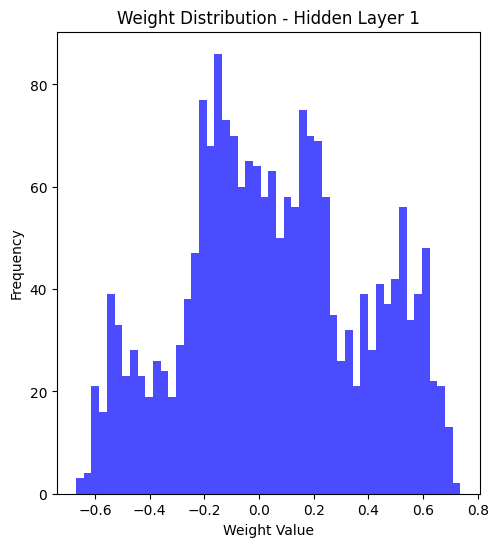

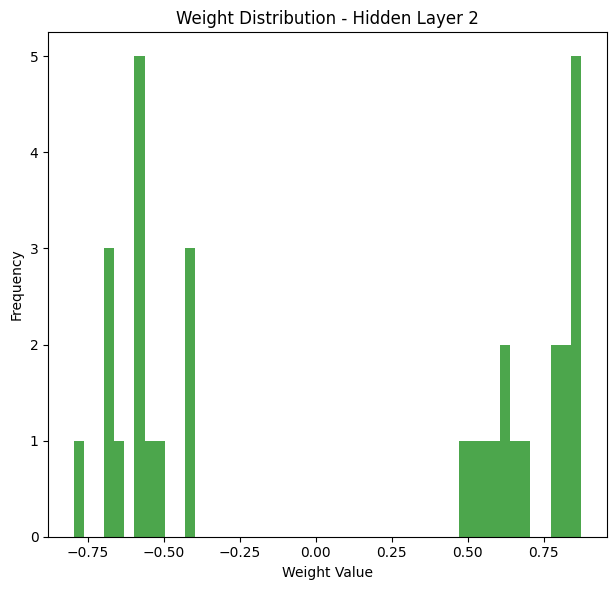

In [11]:
import matplotlib.pyplot as plt
# Get the weights from the first hidden layer
weights_hidden1 = model.layers[1].get_weights()[0]

# Get the weights from the second hidden layer
weights_hidden2 = model.layers[2].get_weights()[0]

# Plot histograms of the weight distributions
plt.figure(figsize=(12, 6))

# First hidden layer
plt.subplot(1, 2, 1)
plt.hist(weights_hidden1.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Weight Distribution - Hidden Layer 1')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.figure(figsize=(12, 6))
# Second hidden layer
plt.subplot(1, 2, 2)
plt.hist(weights_hidden2.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Weight Distribution - Hidden Layer 2')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [69]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define a function to create and train the model with different architectures
def build_and_train_model(hidden_layer_sizes, epochs):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(2,)))  # Input layer for 2 PCA components

    for size in hidden_layer_sizes:
        model.add(keras.layers.Dense(size, activation='relu'))  # Hidden layers with ReLU activation

    model.add(keras.layers.Dense(1))  # Output layer with a single neuron for regression

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

    # Train the model on the training data
    model.fit(X_train, y_train, epochs=epochs, verbose=0)  # You can adjust the number of epochs

    # Evaluate the model on the test data
    results = model.evaluate(X_test, y_test, verbose=0)
    mse = results[1]  # MSE
    mae = results[2]  # MAE

    return mse, mae

# Define the architectures to test
architectures = [
    ([64, 32], 100),
    ([128, 64, 32], 100),
    ([64, 64, 64], 100),
    ([128, 128, 64], 100),
    ([256, 128, 64], 100),
    ([128, 64, 32, 16], 100),
    ([64, 32], 200),
    ([128, 64, 32], 200),
    ([64, 64, 64], 200),
    ([128, 128, 64], 200),
    ([256, 128, 64], 200),
    ([64, 64, 32], 100),
    ([128, 64, 32, 16], 100),
    ([64, 64, 32], 200),
    ([128, 64, 32, 16], 200),
    ([32, 32, 32, 32], 100),
    ([64, 64, 64, 64], 100),
    ([32, 32, 32, 32], 200),
    ([64, 64, 64, 64], 200),
    ([32, 32, 32, 32, 32], 200)
]

# Iterate through these architecture combinations to find the best one


# Initialize variables to track the best architecture and performance
best_architecture = None
best_mse = float('inf')
best_mae = float('inf')

# Iterate through different architectures
for hidden_layer_sizes, epochs in architectures:
    mse, mae = build_and_train_model(hidden_layer_sizes, epochs)

    # Check if the current architecture is the best so far
    if mse < best_mse:
        best_mse = mse
        best_mae = mae
        best_architecture = (hidden_layer_sizes, epochs)

# Print the best architecture and corresponding performance
print("Best Architecture:", best_architecture)
print("Best Mean Squared Error:", best_mse)
print("Best Mean Absolute Error:", best_mae)


KeyboardInterrupt: 

/Users/siddharthdeo/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Best Architecture: ([32, 32, 32, 32], 200)
Best Mean Squared Error: 148.03761291503906
Best Mean Absolute Error: 9.57880973815918


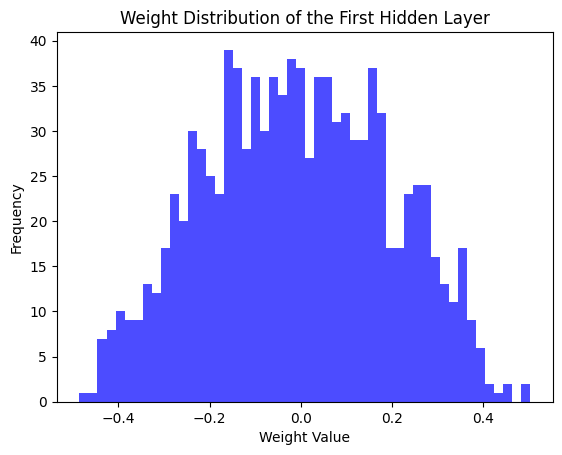

In [73]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define a function to create, train, and optionally save the model with different architectures
def build_and_train_model(hidden_layer_sizes, epochs, save_model=False):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(2,)))  # Input layer for 2 PCA components

    for size in hidden_layer_sizes:
        model.add(keras.layers.Dense(size, activation='relu'))  # Hidden layers with ReLU activation

    model.add(keras.layers.Dense(1))  # Output layer with a single neuron for regression

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

    # Train the model on the training data
    model.fit(X_train, y_train, epochs=epochs, verbose=0)  # You can adjust the number of epochs

    # Optionally save the model
    if save_model:
        model.save('best_model.h5')

    # Evaluate the model on the test data
    results = model.evaluate(X_test, y_test, verbose=0)
    mse = results[1]  # MSE
    mae = results[2]  # MAE

    return mse, mae

# Initialize variables to track the best architecture and performance
best_architecture = None
best_mse = float('inf')
best_mae = float('inf')

# Iterate through different architectures
for hidden_layer_sizes, epochs in architectures:
    mse, mae = build_and_train_model(hidden_layer_sizes, epochs, save_model=True)

    # Check if the current architecture is the best so far
    if mse < best_mse:
        best_mse = mse
        best_mae = mae
        best_architecture = (hidden_layer_sizes, epochs)

# Print the best architecture and corresponding performance
print("Best Architecture:", best_architecture)
print("Best Mean Squared Error:", best_mse)
print("Best Mean Absolute Error:", best_mae)

# Load the best model
best_model = load_model('best_model.h5')

# Visualize the weight distribution of the first hidden layer
weights_first_layer = best_model.layers[1].get_weights()[0]
plt.hist(weights_first_layer.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Weight Distribution of the First Hidden Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()


Best Architecture: ([256, 128, 64], 100)
Best Mean Squared Error: 146.08160400390625
Best Mean Absolute Error: 9.381174087524414


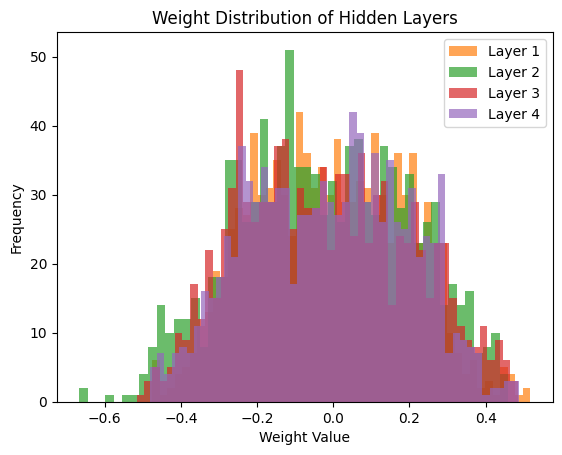

In [74]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define a function to create, train, and optionally save the model with different architectures
def build_and_train_model(hidden_layer_sizes, epochs, save_model=False):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(2,)))  # Input layer for 2 PCA components

    for size in hidden_layer_sizes:
        model.add(keras.layers.Dense(size, activation='relu'))  # Hidden layers with ReLU activation

    model.add(keras.layers.Dense(1))  # Output layer with a single neuron for regression

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

    # Train the model on the training data
    model.fit(X_train, y_train, epochs=epochs, verbose=0)  # You can adjust the number of epochs

    # Optionally save the model
    if save_model:
        model.save('best_model.h5')

    # Evaluate the model on the test data
    results = model.evaluate(X_test, y_test, verbose=0)
    mse = results[1]  # MSE
    mae = results[2]  # MAE

    return model, mse, mae

# Initialize variables to track the best architecture and performance
best_architecture = None
best_mse = float('inf')
best_mae = float('inf')

# Iterate through different architectures
for hidden_layer_sizes, epochs in architectures:
    model, mse, mae = build_and_train_model(hidden_layer_sizes, epochs, save_model=True)

    # Check if the current architecture is the best so far
    if mse < best_mse:
        best_mse = mse
        best_mae = mae
        best_architecture = (hidden_layer_sizes, epochs)

# Print the best architecture and corresponding performance
print("Best Architecture:", best_architecture)
print("Best Mean Squared Error:", best_mse)
print("Best Mean Absolute Error:", best_mae)

# Load the best model
best_model = load_model('best_model.h5')

# Visualize the weight distribution of all hidden layers
for i, layer in enumerate(best_model.layers[1:-1], 1):
    weights_layer = layer.get_weights()[0]
    plt.hist(weights_layer.flatten(), bins=50, color=f'C{i}', alpha=0.7, label=f'Layer {i}')

plt.title('Weight Distribution of Hidden Layers')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Best Architecture: ([128, 64, 32, 16], 100)
Best Mean Squared Error: 144.7958984375
Best Root Mean Squared Error: 12.033116738297688
Best Mean Absolute Error: 9.402937889099121


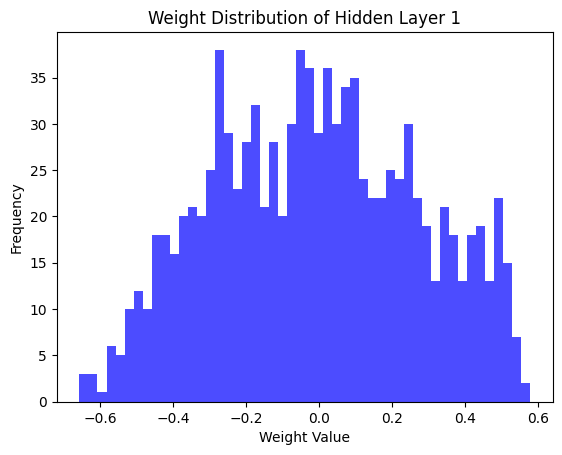

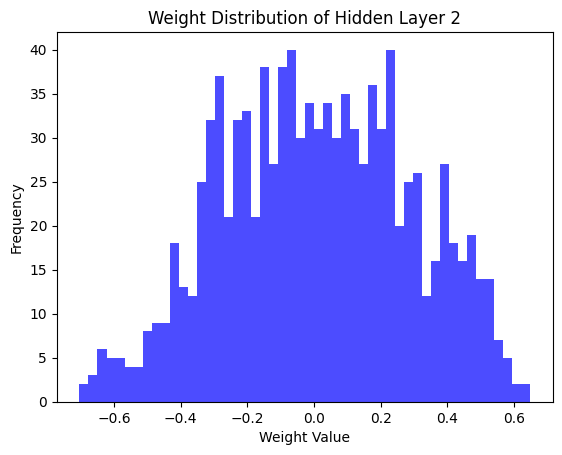

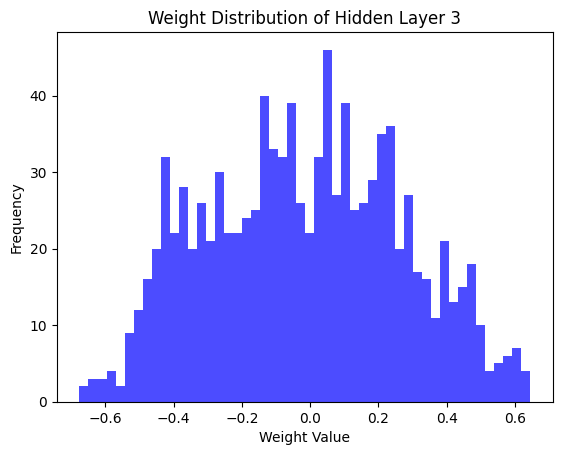

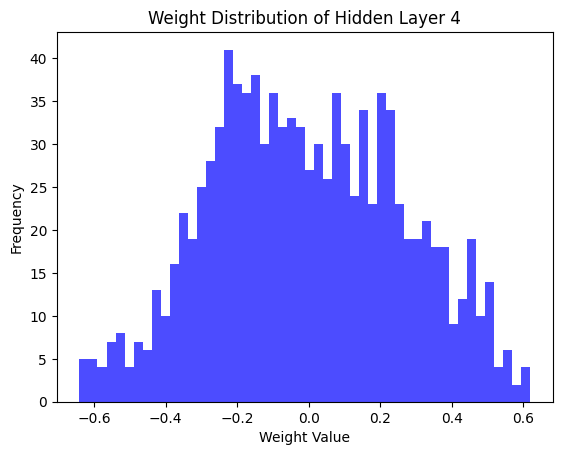

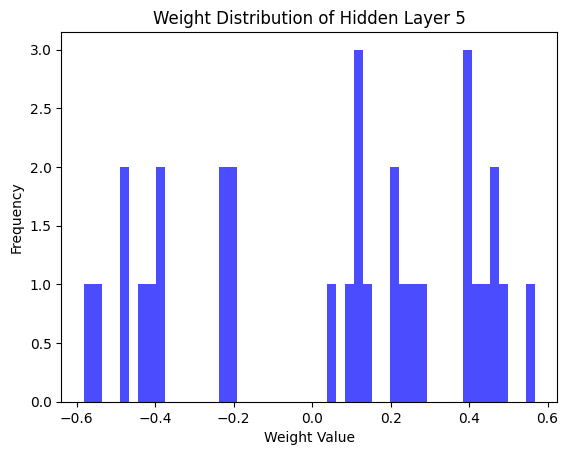

In [78]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Define a function to create, train, and optionally save the model with different architectures
def build_and_train_model(hidden_layer_sizes, epochs, save_model=False):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(2,)))  # Input layer for 2 PCA components

    for size in hidden_layer_sizes:
        model.add(keras.layers.Dense(size, activation='relu'))  # Hidden layers with ReLU activation

    model.add(keras.layers.Dense(1))  # Output layer with a single neuron for regression

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

    # Train the model on the training data
    model.fit(X_train, y_train, epochs=epochs, verbose=0)  # You can adjust the number of epochs

    # Optionally save the model
    if save_model:
        model.save('best_model.h5')

    # Evaluate the model on the test data
    results = model.evaluate(X_test, y_test, verbose=0)
    mse = results[1]  # MSE
    rmse = np.sqrt(mse)  # RMSE
    mae = results[2]  # MAE

    return mse, rmse, mae

# Initialize variables to track the best architecture and performance
best_architecture = None
best_mse = float('inf')
best_rmse = float('inf')
best_mae = float('inf')

# Iterate through different architectures
for hidden_layer_sizes, epochs in architectures:
    mse, rmse, mae = build_and_train_model(hidden_layer_sizes, epochs, save_model=True)

    # Check if the current architecture is the best so far
    if mse < best_mse:
        best_mse = mse
        best_rmse = rmse
        best_mae = mae
        best_architecture = (hidden_layer_sizes, epochs)

# Print the best architecture and corresponding performance
print("Best Architecture:", best_architecture)
print("Best Mean Squared Error:", best_mse)
print("Best Root Mean Squared Error:", best_rmse)
print("Best Mean Absolute Error:", best_mae)

# Load the best model
best_model = load_model('best_model.h5')

# Visualize the weight distribution for each hidden layer in separate figures
for i, layer in enumerate(best_model.layers[1:]):
    weights_layer_i = layer.get_weights()[0]
    plt.figure()
    plt.hist(weights_layer_i.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f'Weight Distribution of Hidden Layer {i+1}')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()


In [43]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have already defined X_train, X_test, y_train, y_test

best_architecture = ([64, 64, 64], 200)

model = keras.Sequential()
model.add(keras.layers.Input(shape=(2,)))  # Input layer for 2 PCA components

for size in best_architecture[0]:
    model.add(keras.layers.Dense(size, activation='relu'))  # Hidden layers with ReLU activation

model.add(keras.layers.Dense(1))  # Output layer with a single neuron for regression

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=best_architecture[1], verbose=1)  # You can adjust the number of epochs

# Evaluate the model on the test data
results = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", results[1])  # MSE
print("Mean Absolute Error:", results[2])  # MAE


Epoch 1/200
5/5 [==============================] - 3s 226ms/step - loss: 12078.7656 - mean_squared_error: 12078.7656 - mean_absolute_error: 109.1434
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 12054.3643 - mean_squared_error: 12054.3643 - mean_absolute_error: 109.0315
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 12029.5479 - mean_squared_error: 12029.5479 - mean_absolute_error: 108.9169
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 12003.0518 - mean_squared_error: 12003.0518 - mean_absolute_error: 108.7955
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 11974.6240 - mean_squared_error: 11974.6240 - mean_absolute_error: 108.6642
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 11943.3877 - mean_squared_error: 11943.3877 - mean_absolute_error: 108.5208
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 11903.8730 - mean_squared_error: 11903.873

# Save merged_principal_components


In [ ]:
import numpy as np

# Specify the filename where you want to save the data
file_name = "merged_principal_components.npy"

# Use numpy.save to save the array
np.save(file_name, merged_principal_components)


Load merged_principal_components

In [1]:
import numpy as np
merged_principal_components = np.load("merged_principal_components.npy")

In [2]:
merged_principal_components

array([[-0.58445773, -0.49847883],
       [-0.17045801,  0.23588523],
       [ 0.28758422, -0.10380386],
       [ 0.44531882,  0.16271896],
       [-0.09578114, -0.13757358],
       [ 0.12791038, -0.05987536],
       [ 0.37694118,  0.07859272],
       [-0.33815038,  0.13001529],
       [-0.07602133,  0.02252206],
       [-0.00843845,  0.46688888],
       [ 0.06311287, -0.33755531],
       [-0.09342142,  0.75419157],
       [ 0.07025279, -0.44144271],
       [ 0.00834375, -0.26468543],
       [-0.22926714,  0.43654906],
       [ 0.22070324,  0.08680398],
       [-0.08698846, -0.09227784],
       [-0.3418201 , -0.01124418],
       [ 0.07709445, -0.20740742],
       [-0.27850843, -0.02167553],
       [ 0.36478713,  0.04803537],
       [ 0.17503104,  0.49762478],
       [ 0.4275898 ,  0.1008533 ],
       [-0.03239319, -0.1074289 ],
       [ 0.42372886, -0.22487245],
       [-0.04332405,  0.60145514],
       [ 0.27798051, -0.26918556],
       [-0.25759713, -0.53377996],
       [ 0.82362482,

CNN

In [ ]:
import nibabel as nib
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense

# Load the NIfTI image
img = nib.load('MR_9536886_6b8e/12/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii')
data = img.get_fdata()


data = (data - np.min(data)) / (np.max(data) - np.min(data))

# Reshape the data to have a single "time" dimension
data = np.expand_dims(data, axis=0)  # Add batch dimension
data = np.expand_dims(data, axis=4)  # Add channel dimension (even if it's 1)

# Define a simple CNN architecture for feature extraction
cnn_model = Sequential([
    Conv3D(32, (3, 3, 3), activation='relu', input_shape=data.shape[1:]),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten()
])

# Apply the CNN to your data
features = cnn_model.predict(data)


# Predicting Individual FSIQ

In [ ]:
tiv_filename = '/Users/siddharthdeo/Downloads/Segmented images/TIVfinal.txt'

# Initialize an empty list to store TIV values
tiv_values = []

with open(tiv_filename, 'r') as file:
    for line in file:
        tiv = float(line.strip())
        tiv_values.append(tiv)

In [ ]:

# Calculate the mean TIV
mean_tiv = sum(tiv_values) / len(tiv_values)

# Assuming you have an individual TIV value
individual_tiv = 1376.56  # Replace with your actual value

# Calculate the global TIV rescaling factor
global_tiv_rescaling_factor = individual_tiv / mean_tiv

print(f"Global TIV Rescaling Factor: {global_tiv_rescaling_factor}")


In [ ]:
import numpy as np
import nibabel as nib
# from sklearn.externals import joblib  # For loading PCA and SVR models

# # Load the trained PCA and SVR models
# pca_model = joblib.load('pca_model.pkl')  # Load your PCA model
# svr_model = joblib.load('svr_model.pkl')  # Load your SVR model

# Load the individual MRI image
img = nib.load('MR_1013090_500c/11/DEFACED_NIFTI/mri/p0defaced_MPRAGE.nii')
data = img.get_fdata()
flattened_data = data.reshape(-1, data.shape[-1])

num_components = 2
pca = PCA(n_components=num_components)
# principal_components = pca.fit_transform(flattened_data)

# Apply PCA and rescaling
# Assume 'data' has shape (192, 256, 256) for example purposes, adjust as needed
# flattened_data = data.reshape(-1, data.shape[-1])  # Flatten the image
pca_features = pca.fit_transform(flattened_data)  # Apply PCA
scaled_features = pca_features / global_tiv_rescaling_factor  # Apply global TIV rescaling

# Predict FSIQ
predicted_fsiq = svr.predict(scaled_features)

print(f"Predicted FSIQ: {predicted_fsiq[0]} and Original FSIQ: 109")


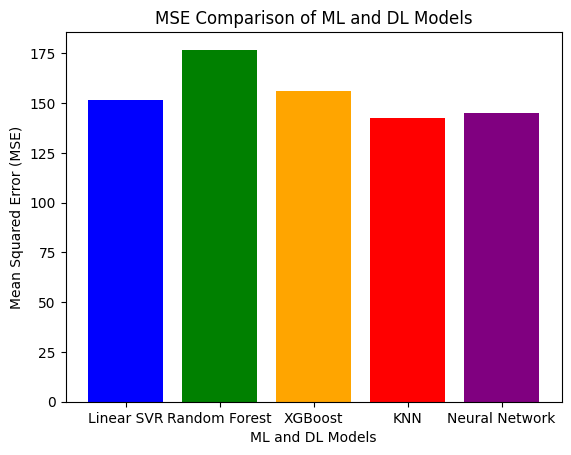

In [87]:
import matplotlib.pyplot as plt

# MSE values for each model (replace these with actual values)
model_names = ['Linear SVR', 'Random Forest', 'XGBoost', 'KNN', 'Neural Network']
mse_values = [151.43, 176.78, 156.04, 142.59, 144.79]  # Replace with actual MSE values

# Plotting the bar chart
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('ML and DL Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison of ML and DL Models')
plt.show()


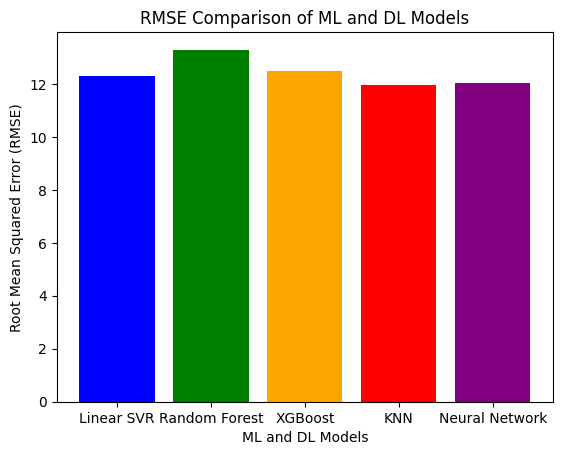

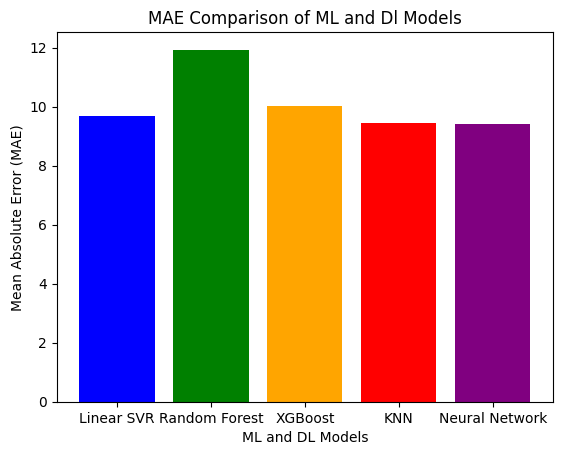

In [90]:
import matplotlib.pyplot as plt

# RMSE values for each model (replace these with actual values)
rmse_values = [12.31, 13.29, 12.49, 11.94, 12.03]  # Replace with actual RMSE values

# Plotting the bar chart for RMSE
plt.bar(model_names, rmse_values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('ML and DL Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Comparison of ML and DL Models')
plt.show()

# MAE values for each model (replace these with actual values)
mae_values = [9.69, 11.93, 10.03, 9.45, 9.40]  # Replace with actual MAE values

# Plotting the bar chart for MAE
plt.bar(model_names, mae_values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('ML and DL Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison of ML and Dl Models')
plt.show()
